<a href="https://colab.research.google.com/github/peterbmob/DHMVADoE/blob/main/PCA_ex.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Principal Component Analysis

Adapted from The E-Learning project SOGA-Py was developed at the Department of Earth Sciences by Annette Rudolph, Joachim Krois and Kai Hartmann. You can reach us via mail by soga[at]zedat.fu-berlin.de.

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA


In [2]:
food = pd.read_csv("https://userpage.fu-berlin.de/soga/data/raw-data/food-texture.csv")
# exclude first column
food = food.iloc[:, 1:]
food.head()

,Oil,Density,Crispy,Fracture,Hardness
0,16.5,2955,10,23,97
1,17.7,2660,14,9,139
2,16.2,2870,12,17,143
3,16.7,2920,10,31,95
4,16.3,2975,11,26,143


In [3]:
# center and scale the data
food_scaled = (food - food.mean()) / food.std()
food_scaled.head()

# Calculate the PCA
food_pca = PCA().fit(food_scaled)

The object stores the eigenvectors as a matrix in the components_ attribute. The name relates to the term rotation matrix and emphasis that a matrix-multiplication of the data-matrix with the rotation matrix returns the coordinates of the data in the rotated coordinate system, and thus the principal component scores.

In [4]:
print(f"Rotation matrix:\n{food_pca.components_}")

Rotation matrix:
[[-0.45753343  0.4787455  -0.53238767  0.50447688 -0.15340262]
 [ 0.37043885 -0.35674997 -0.19766103  0.22123992 -0.8046661 ]
 [-0.6590302  -0.01623973  0.17888443 -0.54227938 -0.48923298]
 [-0.46794489 -0.71846318  0.13252692  0.45693168  0.19618432]
 [-0.01204121 -0.35648161 -0.79242064 -0.44011646  0.22614798]]


The standard deviation can be obtained from the attribute explained_variance_ attribute.

In [5]:
print(f"Standard deviation of each principal component:\n{np.sqrt(food_pca.explained_variance_)}")


Standard deviation of each principal component:
[1.74103796 1.13829072 0.55682074 0.49185372 0.34801098]


This means that the variance explained by each principal component can be obtained from the explained_variance_ attribute.

In [6]:
print(f"Variance explained by each principal component:\n{food_pca.explained_variance_}")

Variance explained by each principal component:
[3.03121317 1.29570576 0.31004934 0.24192008 0.12111165]


To compute the proportion of variance explained by each principal component, we simply divide the variance explained by each principal component by the total variance explained by all principal components:

In [7]:
print(f"Proportion of variance explained by each principal component:\n{food_pca.explained_variance_ratio_}")

Proportion of variance explained by each principal component:
[0.60624263 0.25914115 0.06200987 0.04838402 0.02422233]


We see that the first principal component explains 61% of the variance in the data, the second principal component explains 26% of the variance, and so forth.

Finally, we are interested in the principal component scores, which correspond to the projection of the original data on the directions of the principal component. The principal component scores can be extracted as follows. We will print only the first 10 rows here.

In [8]:
scores = food_pca.transform(food_scaled)
print(f"Principal component scores:\n{scores[:10, :]}")

Principal component scores:
[[ 1.38321116  0.61940609  0.40251151 -0.48680785  0.00594816]
 [-2.79447694 -0.35372463  1.07602689  0.25580128  0.48877325]
 [-0.23755641 -0.86145822  0.61154857  0.02952179  0.17632331]
 [ 1.93934057  1.14173664 -0.43794713  0.31253089 -0.55402198]
 [ 1.26793706 -0.66346458 -0.43716522  0.07190367 -0.40345029]
 [-1.99745643 -1.29835426 -1.1015333  -0.0802596   0.35187991]
 [-1.48818776  0.63265249  0.27302642 -0.03277424 -0.15370096]
 [ 0.82886358  2.3825485   0.24943519  0.32334864  0.03952609]
 [ 1.18515331 -0.350181    0.42578589 -0.01315433 -0.24539644]
 [ 0.99346261 -0.35082583 -0.10334451 -0.02088279 -0.23718893]]


# Visualization and interpretation
The biplot is a very popular way for visualization of results from PCA, as it combines both, the **principal component scores** and the **loading vectors** in a single biplot display. We can create a biplot graph in Python as follows:

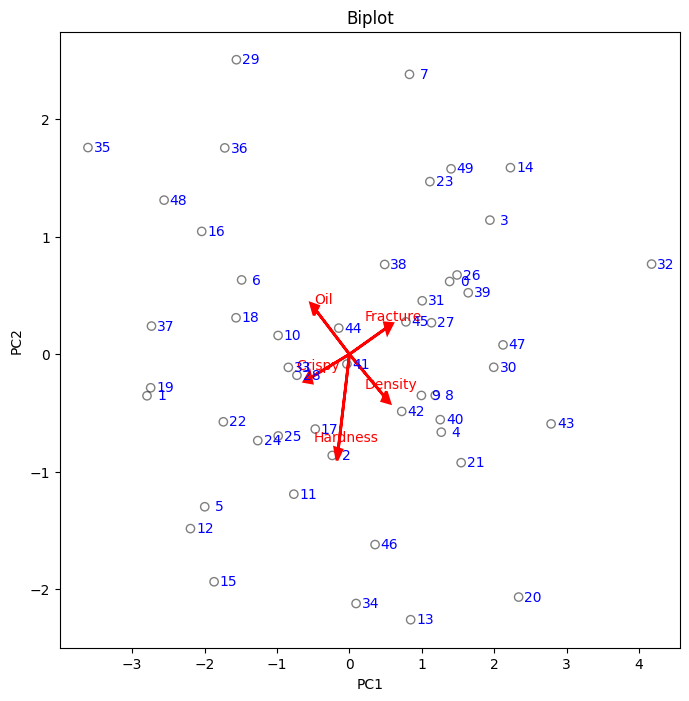

In [10]:
# biplot
fig, ax = plt.subplots(figsize=(8, 8))
ax.scatter(
    scores[:, 0],
    scores[:, 1],
    color="none",
    edgecolor="k",
    alpha=0.5,
)
for i in range(food_pca.components_.shape[1]):
    ax.arrow(
        0,
        0,
        food_pca.components_[0, i],
        food_pca.components_[1, i],
        head_width=0.1,
        head_length=0.1,
        linewidth=2,
        color="red",
    )
    ax.text(
        food_pca.components_[0, i] + 0.1,
        food_pca.components_[1, i] + 0.1,
        food.columns[i],
        color="red",
        ha="center",
        va="center",
    )
for i in range(scores.shape[0]):
    ax.text(
        scores[i, 0] + 0.2,
        scores[i, 1],
        food.index[i],
        color="blue",
        ha="center",
        va="center",
    )
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_title("Biplot")
plt.show()

In the biplot the observations are labeled by the observation number (e.g. the row name in data frame). The position in the plot represents the scores for the first two principal components. The original variables are shown as vectors (arrows). They begin at the origin [0,0] and extend to coordinates given by the first two principal component loading vectors. For example, the loading for Oil on the first component is -0.45, and its loading on the second principal component 0.48 (the label "Oil" is centered at the point (-0.45, 0.48)).